In [2]:
# встроенная библиотека
import math

In [ ]:
# !pip install package_name

In [4]:
!pip install numpy

### numpy 
https://numpy.org/doc/stable/user/absolute_beginners.html

In [5]:
import numpy as np

In [9]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])

In [10]:
x

array([1, 2, 3])

In [11]:
type(x)

numpy.ndarray

In [13]:
x = np.array(
    [
        [1, 2],
        [2, 3],
        [3, 4],
    ]
)

In [15]:
x

array([[1, 2],
       [2, 3],
       [3, 4]])

In [16]:
x.T

array([[1, 2, 3],
       [2, 3, 4]])

In [17]:
x @ x.T

array([[ 5,  8, 11],
       [ 8, 13, 18],
       [11, 18, 25]])

In [24]:
y = np.random.normal(size=(4, 5))

In [25]:
y

array([[ 1.04218996,  1.12600366, -0.21677243, -0.26478049,  0.00364916],
       [ 0.9369966 ,  0.42228828, -0.98555922,  1.06003304, -1.58570217],
       [-0.42332715, -1.06900276,  0.78288318,  1.47356431,  0.46006538],
       [-0.16614261,  0.07860774,  0.38469757,  0.97517097,  1.37137451]])

# Введение в pandas. Анализируем клипы на YouTube

Подгрузим нужные пакеты

In [26]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками

## Об обозначениях

Данные удобно представимы в виде таблиц. Обычно по строкам таких таблиц находятся наблюдения (`observations`), а по столбцам - признаки (`variables`).  

<img src="../images/table.png" width="500">

Не перестанем повторять, что все в _python_ является объектом. Для таких табличек тоже есть свой тип объекта - `DataFrame` из пакета pandas.  

`DataFrame` содержит в себе еще несколько объектов: объекты `Index` и `Series`
* `Index` - это то, каким образом пронумерованы ваши строки. Обычно индексом являются числа от 0 до кол-ва строк, но могут быть и что-то другое, например, на картинке выше индексом выступают модели автомобилей
* `Series` - это объект для отдельной колонки датафрейма

## 1. Смотрим на данные 

Будем тренироваться на собранных данных по клипам ютуба. Датасет содержит следующие колонки:   

__Описание колонок:__

- `title` - название видео
- `commentCount` - число комментариев
- `dislikeCount` - число дизлайков
- `likeCount`  - число лайков
- `music_style` - музыкальный стиль
- `performer` - исполнитель
- `viewCount` - число просмотров
- `commentators_uniq` - число уникальных комментаторов
- `comments_obscene_cnt` - число комментариев
- `video_age` - возраст видео в днях

Возраст видео посчитан в днях относительно `2019-03-15` (момент, когда данные собирались вот этим крутым дата-шрушером: https://github.com/FUlyankin).

In [34]:
# подгружаем данные
df = pd.read_csv("data/youtube_data_short.csv", sep="\t")

In [36]:
type(df)

pandas.core.frame.DataFrame

In [35]:
df

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361
...,...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,NaN,NaN,44
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997


In [39]:
# смотрим на первые 5 строк
df.head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361


In [40]:
df.head(2)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217


In [5]:
# смотрим на последние 5 строк
df.tail()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,NaN,NaN,44
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997
19123,🎄#премьера песни!!! 2019г(вы не спешите говори...,1.0,0.0,22.0,shanson,бутырка,1566.0,NaN,NaN,65


In [41]:
# смотрим на размерность данных (кол-во строк, кол-во столбцов)
df.shape

(19124, 10)

In [42]:
nrow, ncol = df.shape

In [46]:
df.shape[0]

19124

__Классификация переменных по типу данных:__  

* `int` $-$ числовой, целые числа (1000, 0, -1)
* `float` $-$ числовой, вещественные числа (1.0, 2.564523)
* `object` $-$ строковый (бутырка, rock, f12aaz//)
* `bool` $-$ булевский (True, False)
* `datetime` $-$ дата (2020-01-12, 23.Jan.20)


__Классификация переменных по смыслу:__  

* `Непрерывные` $-$ содержат непрерывное множество значений на каком-то промежутке (з/п, рост человека, вес буханки хлеба и тд)
* `Категориальные` $-$ содержат конечное небольшое множество значений (возраст детей, тип магазина)
* `Бинарные` $-$ подтип категориальной переменной, имеющей только 2 категории (пол, столицы двух стран)

In [10]:
# смотрим на типы переменных 
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

In [12]:
# подробнее
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


In [50]:
df.describe(percentiles=[0.99, 0.95, 0.9, 0.25, 0.75])

,commentCount,dislikeCount,likeCount,viewCount,commentators_uniq,comments_obscene_cnt,video_age
count,18914.000000,18850.000000,1.885000e+04,1.912300e+04,12314.000000,12314.000000,19124.000000
mean,394.026065,745.344297,5.735014e+03,8.436486e+05,131.594608,8.952899,1389.772642
std,4200.463284,9339.777800,3.890303e+04,6.382348e+06,333.584804,37.887947,1054.261698
min,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.800000e+01,1.915000e+03,4.000000,0.000000,378.000000
50%,5.000000,5.000000,1.000000e+02,1.135300e+04,13.000000,0.000000,1213.000000
75%,35.000000,38.000000,6.367500e+02,8.180900e+04,61.000000,2.000000,2218.000000
90%,299.000000,330.100000,5.497400e+03,6.415158e+05,373.700000,15.000000,2985.000000
95%,942.350000,1208.000000,1.738845e+04,2.292984e+06,892.000000,44.000000,3238.850000
99%,7288.310000,12780.140000,1.281466e+05,1.670027e+07,1843.000000,191.870000,3730.000000


In [49]:
df.describe(include=['object'])

,title,music_style,performer
count,19124,19124,19124
unique,18029,7,111
top,Алексей Кортнев и Валдис Пельш в проекте «Две ...,rock,николаев
freq,11,5888,566


## 2. Достаем часть информации

1. Достаем колонки. Результат $-$ объект типа Series

In [53]:
df.head(2)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217


In [21]:
# 1ый способ
df['title']

0                                "#2Маши "Свободные линии"
1                "ALARM" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )
2        "EARTH SONG"  SERGEY LAZAREV. DEDICATED TO MIC...
3                   "Earth song" премия МУЗ-тВ 2010 (LIVE)
4                           "FAKE" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)
                               ...                        
19119                  ♫♪Мы расстаемся ♫♪  Бутырка new2019
19120    ❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...
19121                                      モスクワライブショー ' 17
19122    舞梅鬼   -  新年好宝贝 / Mumiy Troll - Happy New Year ...
19123    🎄#премьера песни!!! 2019г(вы не спешите говори...
Name: title, Length: 19124, dtype: object

In [22]:
# 2ой способ
df.title

0                                "#2Маши "Свободные линии"
1                "ALARM" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )
2        "EARTH SONG"  SERGEY LAZAREV. DEDICATED TO MIC...
3                   "Earth song" премия МУЗ-тВ 2010 (LIVE)
4                           "FAKE" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)
                               ...                        
19119                  ♫♪Мы расстаемся ♫♪  Бутырка new2019
19120    ❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...
19121                                      モスクワライブショー ' 17
19122    舞梅鬼   -  新年好宝贝 / Mumiy Troll - Happy New Year ...
19123    🎄#премьера песни!!! 2019г(вы не спешите говори...
Name: title, Length: 19124, dtype: object

In [23]:
type(df['title'])

pandas.core.series.Series

2. Достаем значения из колонки. Результат $-$ нумпаевский массив

In [60]:
df.head(2)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217


In [59]:
df.title.tolist()  # df['title'].tolist()

['"#2Маши "Свободные линии"',
 '"ALARM" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )',
 '"EARTH SONG"  SERGEY LAZAREV. DEDICATED TO MICHAEL JACKSON ( Cover version)',
 '"Earth song" премия МУЗ-тВ 2010 (LIVE)',
 '"FAKE" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)',
 '"Feelin High" Сергей Лазарев Sergey Lazarev live',
 '"Girlfriend" Сергей Лазарев (SERGEY)',
 '"Heartbeat" Сергей Лазарев (Sergey Lazarev)',
 '"Hey Tovarish" Video Shooting',
 '"LAZERBOY" Сергей Лазарев (SERGEY) feat. TИМАТИ (Timati)',
 '"LAZERBOY"( Michael Yousher videoremix) Сергей Лазарев (SERGEY) и ТИМАТИ',
 '"Lost without your love" Сергей Лазарев (SERGEY)',
 '"Love Radio": Съемки клипа НЮШИ "Наедине"',
 '"Ru Music": НЮША сняла новый клип!',
 '"Ru Новости": НЮША чудом вернулась в Москву!',
 '"SOS Матросу!" - тизер фильма',
 '"STEREO" (LIVE) Сергей Лазарев (SERGEY)',
 '"Shattered dreams" Сергей Лазарев (SERGEY)',
 '"Tv or radio" Сергей Лазарев (SERGEY)',
 '"You Are The Only One" - Sergey Lazarev /MadWalk Fashion Music Show',
 '"Аве Мария" Весь зал пла

In [29]:
df.title.values

array(['"#2Маши "Свободные линии"',
       '"ALARM" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )',
       '"EARTH SONG"  SERGEY LAZAREV. DEDICATED TO MICHAEL JACKSON ( Cover version)',
       ..., "モスクワライブショー ' 17",
       "舞梅鬼   -  新年好宝贝 / Mumiy Troll - Happy New Year Baby (Fan's  Video)",
       '🎄#премьера песни!!! 2019г(вы не спешите говорит)группа.Бутырка.'],
      dtype=object)

In [30]:
type(df.title.values)

numpy.ndarray

3. Достаем отдельные строки либо подтаблицы

In [63]:
sample_df = df.sample(n=10)

In [68]:
sample_df.index

Int64Index([9571, 4373, 11236, 3834, 7218, 9848, 7726, 12652, 3108, 11193], dtype='int64')

In [69]:
sample_df.head(3)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
9571,Звери - Для тебя,331.0,323.0,8385.0,rock,звери,2021057.0,157.0,3.0,1756
4373,Whats Your Problem,0.0,0.0,5.0,popsa,serebro,488.0,NaN,NaN,41
11236,Кукрыниксы - Чёрный человек (Зал Ожидания 25.0...,0.0,0.0,12.0,rock,кукрыниксы,785.0,NaN,NaN,2231


In [71]:
mini_df = sample_df.loc[[9571, 11236], ['title', 'dislikeCount', 'likeCount']]

In [72]:
mini_df

,title,dislikeCount,likeCount
9571,Звери - Для тебя,323.0,8385.0
11236,Кукрыниксы - Чёрный человек (Зал Ожидания 25.0...,0.0,12.0


In [33]:
# loc - по названию строк и столбцов 
df.loc[[45, 50], ['title', 'likeCount']]

,title,likeCount
45,"""Глаза - убийцы"". Первые впечатления",23.0
50,"""ДОстояние РЕспублики"" - Игорь Николаев (1)",80.0


In [36]:
# iloc - по номеру строки и столбца
df.iloc[[45, 50], [0, 3]]

,title,likeCount
45,"""Глаза - убийцы"". Первые впечатления",23.0
50,"""ДОстояние РЕспублики"" - Игорь Николаев (1)",80.0


4. Условные срезы

In [45]:
# достаем несколько колонок
df[['title', 'performer']].head()

,title,performer
0,"""#2Маши ""Свободные линии""",2маши
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",лазарев
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",лазарев
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",лазарев
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",лазарев


In [80]:
exlude_cols = ['title', 'performer']

In [84]:
# 1 option
need_cols = list(set(df.columns) - set(exlude_cols))
df[need_cols]

In [88]:
# 2 option
# axis = 0 – работа со строкам
# axis = 1 - работа со столбцами
df2 = df.drop(exlude_cols, axis=1)

In [90]:
df2.head()

,commentCount,dislikeCount,likeCount,music_style,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,34.0,43.0,1402.0,popsa,214301.0,24.0,0.0,1141
1,NaN,690.0,10532.0,popsa,2221419.0,NaN,NaN,3217
2,26.0,10.0,269.0,popsa,40327.0,23.0,0.0,3546
3,12.0,7.0,163.0,popsa,11907.0,11.0,0.0,3189
4,46.0,19.0,597.0,popsa,91483.0,33.0,1.0,3361


In [73]:
# либо так
useful_cols = ['title', 'performer']
df[useful_cols].head()

,title,performer
0,"""#2Маши ""Свободные линии""",2маши
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",лазарев
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",лазарев
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",лазарев
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",лазарев


In [75]:
df2 = df[useful_cols]

In [78]:
df.likeCount == 0

0        False
1        False
2        False
3        False
4        False
         ...  
19119    False
19120    False
19121    False
19122    False
19123    False
Name: likeCount, Length: 19124, dtype: bool

In [42]:
# смотрим на клипы с нулевым кол-вом лайков
df.loc[df.likeCount == 0].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
429,1. конф.,0.0,0.0,0.0,rock,несчастный_случай,17.0,NaN,NaN,293
464,16:45 (без четверти пять),0.0,0.0,0.0,rock,несчастный_случай,91.0,NaN,NaN,293
481,2. конф.,0.0,0.0,0.0,rock,несчастный_случай,11.0,NaN,NaN,293
519,3. конф.,0.0,0.0,0.0,rock,несчастный_случай,9.0,NaN,NaN,293
558,4. конф.,0.0,0.0,0.0,rock,несчастный_случай,9.0,NaN,NaN,293


In [43]:
# тоже самое, но хотим не все колонки для экономии места
df.loc[df.likeCount == 0, ['title', 'performer']].head()

,title,performer
429,1. конф.,несчастный_случай
464,16:45 (без четверти пять),несчастный_случай
481,2. конф.,несчастный_случай
519,3. конф.,несчастный_случай
558,4. конф.,несчастный_случай


In [49]:
# несколько условий
# & – and
# | – or
df.loc[(df.likeCount > 0) & (df.dislikeCount == 0)].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,NaN,3819
70,"""КРАЯ РОДНЫЕ"" гр. ""Воровайки"", слова Виктории ...",0.0,0.0,1.0,shanson,воровайки,418.0,NaN,NaN,479
74,"""Король и Шут"" - 15 лет",5.0,0.0,62.0,rock,король_и_шут,6547.0,5.0,0.0,3817
87,"""Мумий Тролль"" уходит в море. Отход ""Седова"".",3.0,0.0,70.0,rock,мумий_тролль,6327.0,3.0,0.0,2482
93,"""НЕ УБЕРЕГЛА ЛЮБОВЬ"" (Audio) гр. ""Воровайки"", ...",0.0,0.0,2.0,shanson,воровайки,985.0,NaN,NaN,499


In [94]:
df.loc[(df.likeCount > 0) & (df.dislikeCount == 0)].shape

(3369, 10)

In [51]:
# либо так
first_cond = df.likeCount > 0
second_cond = df.dislikeCount == 0

df.loc[first_cond & second_cond].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,NaN,3819
70,"""КРАЯ РОДНЫЕ"" гр. ""Воровайки"", слова Виктории ...",0.0,0.0,1.0,shanson,воровайки,418.0,NaN,NaN,479
74,"""Король и Шут"" - 15 лет",5.0,0.0,62.0,rock,король_и_шут,6547.0,5.0,0.0,3817
87,"""Мумий Тролль"" уходит в море. Отход ""Седова"".",3.0,0.0,70.0,rock,мумий_тролль,6327.0,3.0,0.0,2482
93,"""НЕ УБЕРЕГЛА ЛЮБОВЬ"" (Audio) гр. ""Воровайки"", ...",0.0,0.0,2.0,shanson,воровайки,985.0,NaN,NaN,499


## 3. Описательные статистики

**Хотим все и сразу**

In [69]:
df.describe()

,commentCount,dislikeCount,likeCount,viewCount,commentators_uniq,comments_obscene_cnt,video_age
count,18914.000000,18850.000000,1.885000e+04,1.912300e+04,12314.000000,12314.000000,19124.000000
mean,394.026065,745.344297,5.735014e+03,8.436486e+05,131.594608,8.952899,1389.772642
std,4200.463284,9339.777800,3.890303e+04,6.382348e+06,333.584804,37.887947,1054.261698
min,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.800000e+01,1.915000e+03,4.000000,0.000000,378.000000
50%,5.000000,5.000000,1.000000e+02,1.135300e+04,13.000000,0.000000,1213.000000
75%,35.000000,38.000000,6.367500e+02,8.180900e+04,61.000000,2.000000,2218.000000
max,303077.000000,640698.000000,1.686810e+06,2.720477e+08,3702.000000,693.000000,4574.000000


In [14]:
# тоже самое, но над переменными типа object
df.describe(include='object')

,title,music_style,performer
count,19124,19124,19124
unique,18029,7,111
top,Алексей Кортнев и Валдис Пельш в проекте «Две ...,rock,николаев
freq,11,5888,566


**Минимум и максимум**

In [65]:
print(df.likeCount.max())
print(df.likeCount.min())

1686810.0
0.0


In [59]:
# посмотрим на клип, который набрал максимальное кол-во лайков
mx = df.likeCount.max()

df[df.likeCount == mx]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
18649,Элджей & Feduk - Розовое вино,191702.0,151772.0,1686810.0,rap,feduk,208753182.0,3702.0,183.0,485


**Среднее, медиана и мода**

<img src="../images/means.jpg" width="400">

In [74]:
print(df.video_age.mean())
print(df.video_age.median())
print(df.video_age.mode())

1389.7726417067558
1213.0
0    267
dtype: int64


**Квантили и распределение**

In [75]:
# квантиль
df.video_age.quantile(0.99)

3730.0

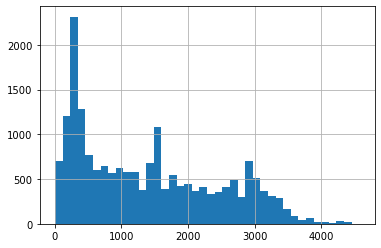

In [96]:
# рисуем полностью распределение 
df.video_age.hist(bins=40);

**Дисперсия и стандартное отклонение**

In [79]:
df.likeCount.var()

1513445598.6358452

In [80]:
df.likeCount.std()

38903.02814223907

In [98]:
df['music_style'].value_counts()

rock       5888
estrada    4151
popsa      3339
shanson    2061
rap        2028
indi       1359
classic     298
Name: music_style, dtype: int64

In [104]:
df['music_style'].value_counts(normalize=True, sort=True, ascending=True)

classic    0.015583
indi       0.071063
rap        0.106045
shanson    0.107770
popsa      0.174597
estrada    0.217057
rock       0.307885
Name: music_style, dtype: float64

## 4. Group by

Итак, мы научились с вами находить среднее в целом по всему датасету. Но что бы было, если бы нам нужно узнать среднее кол-во лайков в каждом жанре? 

In [107]:
df['likeCount'].mean()

5735.014482758621

Немного подумав, мы бы могли ответить на поставленный вопрос с помощью срезов: 

In [83]:
# сначала получаем, какие жанры у нас есть
df['music_style'].unique()

array(['popsa', 'rock', 'classic', 'indi', 'estrada', 'shanson', 'rap'],
      dtype=object)

In [84]:
df[df.music_style == 'popsa'].likeCount.mean()

7492.273791654158

In [85]:
df[df.music_style == 'rap'].likeCount.mean()

26802.456253089473

Однако жанров у нас в датасете достаточно много, поэтому дублировать такой код для каждого жанра может показаться совсем неоптимальным решением. 

К счастью, для таких задач и были придуманы __группировки__:

In [109]:
df['music_style'].value_counts()

rock       5888
estrada    4151
popsa      3339
shanson    2061
rap        2028
indi       1359
classic     298
Name: music_style, dtype: int64

In [86]:
df.groupby('music_style')['likeCount'].mean()

music_style
classic    28663.333333
estrada      938.686662
indi        2471.842299
popsa       7492.273792
rap        26802.456253
rock        2132.887061
shanson      440.390564
Name: likeCount, dtype: float64

In [ ]:
music_style like
rap 10_000
rap 5_000
rap 15_000
shanson 200
shanson 300
shanson 400

In [ ]:
rap 10_000
shanson 300

In [113]:
performer_df = df.groupby('performer')['likeCount'].mean().to_frame().reset_index()

In [119]:
pd.options.display.max_rows = 150

In [120]:
performer_df.sort_values('likeCount', ascending=False)

,performer,likeCount
4,face,93202.920000
105,хаски,65718.636364
92,пошлая_молли,64800.571429
16,oxxxymiron,59106.513889
74,лсп,56649.150943
81,мот,56415.576271
108,элджей,55896.732394
66,крид,54380.736486
5,feduk,38521.617978
63,кока,33208.357513


**Посмотрим теперь на возможности, связанные с groupby**

In [87]:
df.groupby(['music_style', 'performer'])[['likeCount', 'dislikeCount']].agg(['mean', 'count'])

likeCount       dislikeCount      
                                       mean count         mean count
music_style performer                                               
classic     classical_channel  28663.333333   297  1236.228956   297
estrada     агутин                39.333333     3     4.666667     3
            басков              1582.721311   122   233.270492   122
            буйнов                 2.795455    44     0.727273    44
            ваенга               133.773360   503     9.310139   503
...                                     ...   ...          ...   ...
shanson     жека                 505.681159   138    49.702899   138
            ирина_круг          1520.352381   105   185.847619   105
            михаил_круг          418.111340   485    44.216495   485
            трофимов             252.857759   232    15.478448   232
            шуфутинский          357.132565   347    17.040346   347

[111 rows x 4 columns]

In [89]:
df.groupby(['music_style', 'performer'])[['likeCount', 'dislikeCount'] ].agg({'likeCount': 'min', 
                                                                              'dislikeCount': 'max'})

likeCount  dislikeCount
music_style performer                                 
classic     classical_channel        1.0       52892.0
estrada     агутин                   1.0          14.0
            басков                   0.0       11997.0
            буйнов                   0.0          13.0
            ваенга                   1.0         580.0
...                                  ...           ...
shanson     жека                     0.0        3586.0
            ирина_круг               7.0       12906.0
            михаил_круг              0.0        3063.0
            трофимов                 0.0        1037.0
            шуфутинский              0.0        1512.0

[111 rows x 2 columns]

In [140]:
# good
df_agg = (
    df
    .groupby(['music_style', 'performer'], as_index=False)
    .agg(
        mean_likes=('likeCount', 'mean'),
        count_likes=('likeCount', 'count'),
        mean_dislikes=('dislikeCount', 'mean'),
        count_dislikes=('dislikeCount', 'count'),
    )
)

In [141]:
df_agg.head()

,music_style,performer,mean_likes,count_likes,mean_dislikes,count_dislikes
0,classic,classical_channel,28663.333333,297,1236.228956,297
1,estrada,агутин,39.333333,3,4.666667,3
2,estrada,басков,1582.721311,122,233.270492,122
3,estrada,буйнов,2.795455,44,0.727273,44
4,estrada,ваенга,133.773360,503,9.310139,503


## 5. Другие полезные приемы

**Создание новых колонок**

In [142]:
df['likes_uplift'] = (df['likeCount'] - df['dislikeCount']) / df['dislikeCount']

df.columns

Index(['title', 'commentCount', 'dislikeCount', 'likeCount', 'music_style',
       'performer', 'viewCount', 'commentators_uniq', 'comments_obscene_cnt',
       'video_age', 'likes_uplift'],
      dtype='object')

**Удаление колонок**

In [9]:
df = df.drop('likes_uplift', axis=1)
# the same with inplace = True
df.drop('likes_uplift', axis=1, inplace=True)

In [10]:
df.columns

Index(['title', 'commentCount', 'dislikeCount', 'likeCount', 'music_style',
       'performer', 'viewCount', 'commentators_uniq', 'comments_obscene_cnt',
       'video_age'],
      dtype='object')

**Ренейминг колонок**

In [38]:
df.rename(columns={'title':'Title'}, inplace=True)

In [40]:
df.head()

,Title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361


**Сброс индексов**

In [16]:
df.iloc[[10, 20, 30, 40], [0, 1]].reset_index(drop=True)

,title,commentCount
0,"""LAZERBOY""( Michael Yousher videoremix) Сергей...",5.0
1,"""Аве Мария"" Весь зал плакал. Вика 11 лет",3865.0
2,"""Большая семья"" Игоря Николаева - часть 2",3.0
3,"""Всё, что было"". Начало.",23.0


**Уникальные значения**

In [41]:
df['music_style'].value_counts()

rock       5888
estrada    4151
popsa      3339
shanson    2061
rap        2028
indi       1359
classic     298
Name: music_style, dtype: int64

In [42]:
df['music_style'].value_counts(normalize=True)

rock       0.307885
estrada    0.217057
popsa      0.174597
shanson    0.107770
rap        0.106045
indi       0.071063
classic    0.015583
Name: music_style, dtype: float64

In [147]:
df['music_style'].unique()

array(['popsa', 'rock', 'classic', 'indi', 'estrada', 'shanson', 'rap'],
      dtype=object)

In [46]:
df['music_style'].nunique()

7

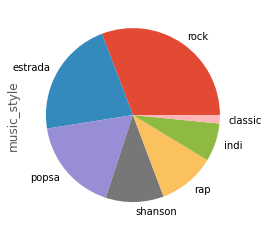

In [48]:
df['music_style'].value_counts().plot(kind='pie');

**apply**

In [19]:
df.title.apply(len)

0        25
1        41
2        75
3        38
4        30
         ..
19119    35
19120    88
19121    15
19122    65
19123    63
Name: title, Length: 19124, dtype: int64

In [20]:
# средняя длина названия
np.mean(df.title.apply(len))

35.293871574984315

**Работа со строками**

* `.isin()` $–$ для того, чтобы оставить лишь те строки, категории которой лежат в некотором списке
* `.str` $–$ для того, чтобы использовать методы, которые есть у строк
* `.str.startswith()` $–$ для того, чтобы оставить строки, которые начинаются с определенного текста
* `.str.contains()` $–$ для того, чтобы оставить строки, содержание которых имеет определенный текст
* _и так далее, подробно методы строк изучали ранее_

In [32]:
interested_styles = ['rock', 'rap']

df['music_style'].isin(interested_styles)

0        False
1        False
2        False
3        False
4        False
         ...  
19119    False
19120    False
19121     True
19122     True
19123    False
Name: music_style, Length: 19124, dtype: bool

In [34]:
# делаем условный срез
df[df['music_style'].isin(interested_styles)].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
8,"""Hey Tovarish"" Video Shooting",10.0,1.0,34.0,rock,мумий_тролль,3815.0,9.0,0.0,2539
15,"""SOS Матросу!"" - тизер фильма",10.0,4.0,68.0,rock,мумий_тролль,7632.0,5.0,0.0,1739
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,NaN,3819
38,"""Виктор Цой. 50 лет"" Кукрыниксы - Печаль, Конч...",2.0,4.0,65.0,rock,кукрыниксы,9986.0,2.0,0.0,2351
40,"""Всё, что было"". Начало.",23.0,5.0,171.0,rock,ария,11168.0,21.0,1.0,2351


In [37]:
# вытаскиваем всех перформеров, начинающихся с буквы б
df[df['performer'].str.startswith('б')].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
42,"""Глаза - убийцы"". Первые впечатления",3.0,11.0,32.0,popsa,барских,6845.0,16.0,1.0,2849
43,"""Глаза - убийцы"". Первые впечатления",4.0,13.0,7.0,popsa,барских,2657.0,16.0,1.0,2850
44,"""Глаза - убийцы"". Первые впечатления",11.0,40.0,42.0,popsa,барских,11713.0,16.0,1.0,2850
45,"""Глаза - убийцы"". Первые впечатления",1.0,10.0,23.0,popsa,барских,5621.0,16.0,1.0,2850
46,"""Глаза - убийцы"". Первые впечатления",5.0,13.0,46.0,popsa,барских,7316.0,16.0,1.0,2850


**Создание DataFrame из словаря**

In [18]:
d = {'names': ['Max', 'Rita', 'Sasha', 'Boris'],
    'score': [8, 7, 10, 4]}

pd.DataFrame(d)

,names,score
0,Max,8
1,Rita,7
2,Sasha,10
3,Boris,4


**Замена значений**

In [24]:
my_df = pd.DataFrame({'name':['Max', 'Rita', 'Sasha', 'Boris'], 'sex': ['M', 'F', 'F', 'M']})
my_df

,name,sex
0,Max,M
1,Rita,F
2,Sasha,F
3,Boris,M


In [27]:
d = {'M': True, 'F': False}

my_df['is_male'] = my_df.sex.map(d)
my_df

,name,sex,is_male
0,Max,M,True
1,Rita,F,False
2,Sasha,F,False
3,Boris,M,True


In [28]:
np.mean(my_df.is_male)

0.5